## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [33]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        
        out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.99, 0.95, 0.90]

In [35]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mom-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0824 01:00:55.647344 12628 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0824 01:00:55.649339 12628 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0824 01:00:55.690735 12628 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 01:00:55.691762 12628 deprecation_wrapper.py:119] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instea

Experiment with MOM = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0824 01:00:56.225911 12628 deprecation.py:323] From C:\Users\ELWIN_NB_PS63\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.0035 - acc: 0.2803 - val_loss: 1.8058 - val_acc: 0.3697
Epoch 2/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7301 - acc: 0.3949 - val_loss: 1.6559 - val_acc: 0.4190
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6062 - acc: 0.4335 - val_loss: 1.5618 - val_acc: 0.4512
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5301 - acc: 0.4628 - val_loss: 1.5143 - val_acc: 0.4661
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4679 - acc: 0.4834 - val_loss: 1.4813 - val_acc: 0.4744
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4180 - acc: 0.4987 - val_loss: 1.4395 - val_acc: 0.4888
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3714 - acc: 0.5144 - val_loss: 1.4150 - 

Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8029 - acc: 0.3695 - val_loss: 1.7538 - val_acc: 0.3876
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7222 - acc: 0.3972 - val_loss: 1.6893 - val_acc: 0.4089
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6649 - acc: 0.4193 - val_loss: 1.6528 - val_acc: 0.4248
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6190 - acc: 0.4354 - val_loss: 1.6082 - val_acc: 0.4308
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5800 - acc: 0.4481 - val_loss: 1.5713 - val_acc: 0.4435
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5468 - acc: 0.4588 - val_loss: 1.5502 - val_acc: 0.4553
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5161 - acc: 0.4670 - val_loss: 1.5286 - val_acc: 0.4615
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 99us/step - loss: 1.8034 - acc: 0.3721 - val_loss: 1.7844 - val_acc: 0.3811
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7525 - acc: 0.3898 - val_loss: 1.7390 - val_acc: 0.3929
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7116 - acc: 0.4038 - val_loss: 1.7108 - val_acc: 0.4021
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6786 - acc: 0.4152 - val_loss: 1.6755 - val_acc: 0.4154
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6492 - acc: 0.4259 - val_loss: 1.6437 - val_acc: 0.4290
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6234 - acc: 0.4338 - val_loss: 1.6223 - val_acc: 0.4340
Epoch 9/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6002 - acc: 0.4407 - val_loss: 1.5991 - val_acc: 0.4406
Epoch 10/50
50000/50000 [======================

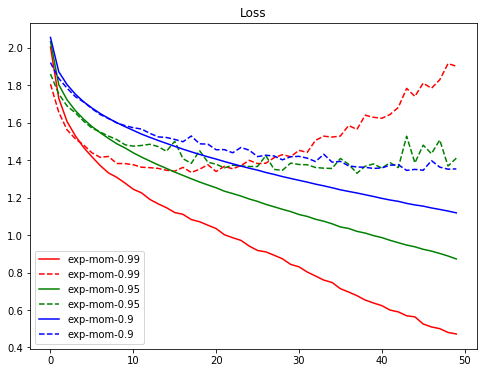

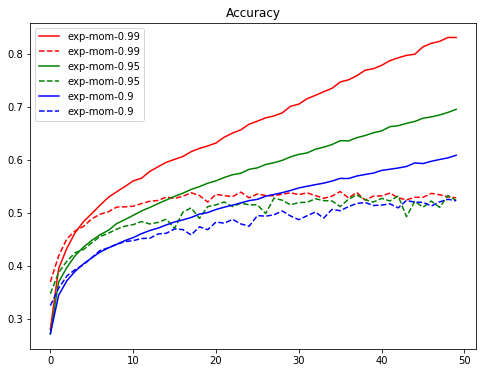

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()